#Experiment
classification task of Balance Scale Weight & Distance Database

##Data preprocessing

In [0]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.style.use('ggplot')

In [2]:
#Load the dataset
df = pd.read_csv('/content/drive/My Drive/机器学习/lab4/arrhythmia.data',header=None)

#Print the first 5 rows of the dataframe.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [3]:
#Let's observe the shape of the dataframe.
df.shape

(452, 280)

In [0]:
X = pd.concat([df.iloc[:,:12],df.iloc[:,22:27], df.iloc[:,269:278]], axis=1, sort=False).values
y = df.iloc[:,279].values

##Feature Selection

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

# Delete column with '?'
df1=df[~df[:].isin(['?'])]
df1 = df1.dropna(axis=1)
# Delete columns with values less than 0
df1[df1 < 0] = np.nan
df1 = df1.dropna(axis=1)

sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
df1 = sel.fit_transform(df1)
print(df1)

# Univariate feature selection
X_old = df1[:,0:94]
y = df.iloc[:,279].values
for i,val in enumerate(y):
    if val == 1:
        y[i] = 1
    elif val > 1 and val < 16:
        y[i] = 2
    else:
        y[i] = 3
y = y.astype('int')

X = SelectKBest(chi2, k=10).fit_transform(X_old, y)
print(X)

[[ 75.    0.  190.  ...  13.5   9.    8. ]
 [ 56.    1.  165.  ...  11.    8.5   6. ]
 [ 54.    0.  172.  ...  11.1   9.5  10. ]
 ...
 [ 36.    0.  166.  ...  22.   16.3   2. ]
 [ 32.    1.  155.  ...  15.3  12.    1. ]
 [ 78.    1.  160.  ...  12.5  10.4   1. ]]
[[20. 48. 80. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [52.  0.  0. ...  0.  0.  0.]
 ...
 [56.  0.  0. ...  0.  0.  0.]
 [ 0. 12.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [0]:
#importing train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##Draw histograms for features

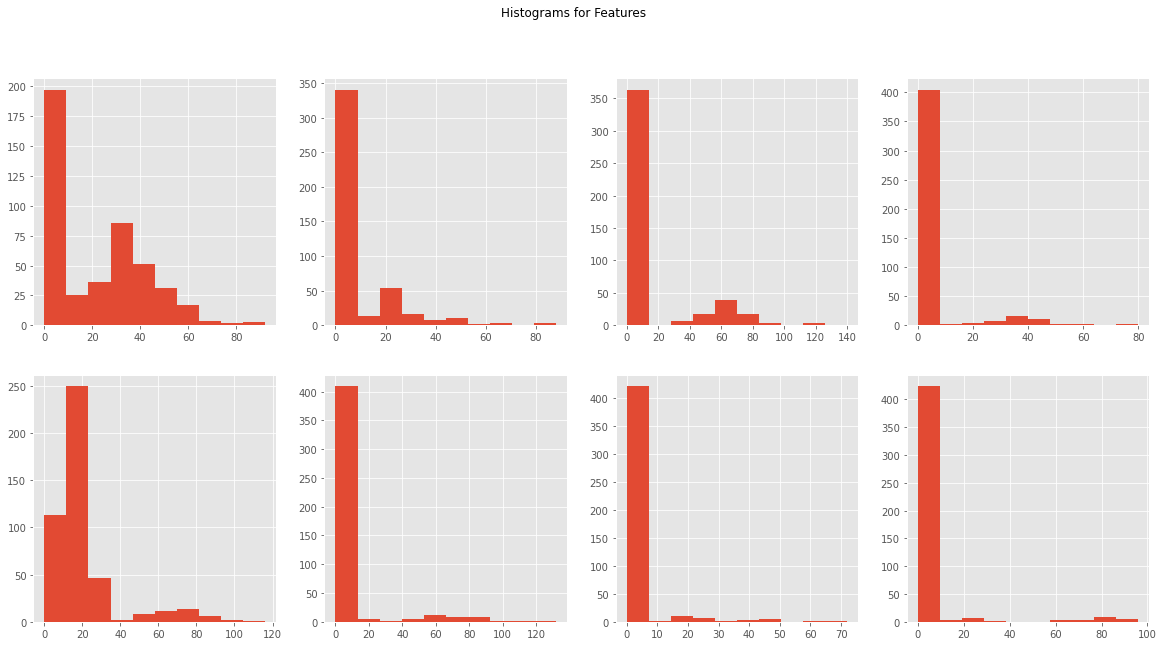

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(241)
plt.hist(X[:,0])
plt.subplot(242)
plt.hist(X[:,1])
plt.subplot(243)
plt.hist(X[:,2])
plt.subplot(244)
plt.hist(X[:,3])

plt.subplot(245)
plt.hist(X[:,4])
plt.subplot(246)
plt.hist(X[:,5])
plt.subplot(247)
plt.hist(X[:,6])
plt.subplot(248)
plt.hist(X[:,7])
plt.suptitle('Histograms for Features')
plt.show()

##Draw scatter plot matrix of features

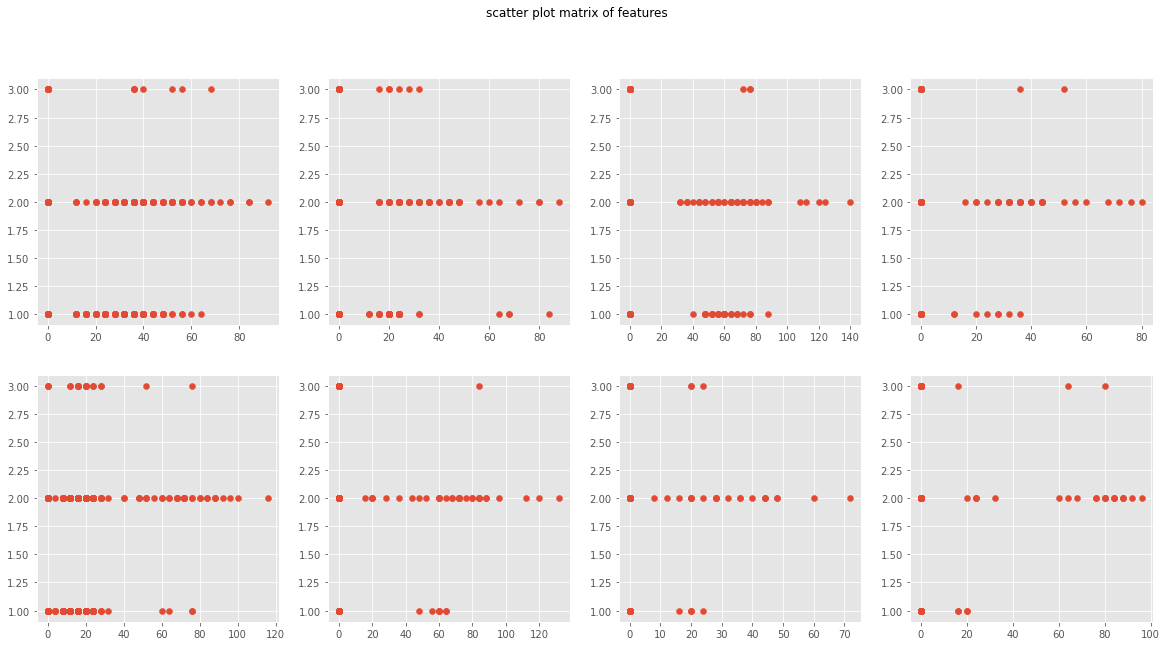

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(241)
plt.scatter(X[:,0],y)
plt.subplot(242)
plt.scatter(X[:,1],y)
plt.subplot(243)
plt.scatter(X[:,2],y)
plt.subplot(244)
plt.scatter(X[:,3],y)
plt.subplot(245)
plt.scatter(X[:,4],y)
plt.subplot(246)
plt.scatter(X[:,5],y)
plt.subplot(247)
plt.scatter(X[:,6],y)
plt.subplot(248)
plt.scatter(X[:,7],y)
plt.suptitle('scatter plot matrix of features')
plt.show()

##Training

In [17]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier().fit(X_train, y_train)
predict = clf.predict(X_test)
clf.score(X_test, y_test)

0.7032967032967034

In [10]:
from sklearn.linear_model import RidgeClassifierCV

clf = RidgeClassifierCV().fit(X_train, y_train)
clf.score(X_test, y_test)

0.7032967032967034

In [12]:
from sklearn import linear_model

clf = linear_model.SGDClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.6813186813186813

In [13]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier().fit(X, y)
clf.score(X_test, y_test)

0.5714285714285714

In [14]:
from sklearn.linear_model import Perceptron

clf = Perceptron().fit(X, y)
clf.score(X_test, y_test)

0.6813186813186813

In [15]:
clf = RidgeClassifier(solver =  'saga').fit(X_train, y_train)

clf.score(X_test, y_test)

0.7032967032967034

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7362637362637363

#Report


## Q: What features are most useful for solving the problem and why, how features are distributed in the data:  



First, I removed the features with low variance, for example, a feature is mostly 0, then this feature is meaningless.
Secondly, some vacant data is meaningless.
Finally, the chi-square test is used to test the correlation of qualitative independent variables to qualitative dependent variables, leaving only the top 10 features that are closely related to the label.

## Q: Try to change parameters of training to achieve better results

At first, the accuracy is very low, only about 60%. It is observed that there are too many data with y label 1, and there are few other 15 categories. Therefore, the other 15 categories are combined into two categories, and all data are divided into three categories for classification. And use LogisticRegression to classify, the accuracy can reach 73%.